# What is Auto_ViML:-
Auto_ViML was designed for building High Performance Interpretable Models with the least variables. The "V" in Auto_ViML stands for Variant because it tries Multiple Models and Multiple Features to find the best performing model for any dataset. The "i" in Auto_ViML stands for "Interpretable" since it selects the fewest features to build a simpler, more interpretable model. This is key. Some of the differentiators of Auto_ViML from other open source AutoML libraries is as follows: Auto_ViML is the package that:

1.Requires no data prep - you can send in your entire dataframe without a single change. It loves dirty data!


2.Requires no classification of variables: All other packages want you to tell them which variables are numeric, categorical, NLP text, date variables etc. autoVimal detects all of these automatically as any AutoML package should!


3.Does feature reduction automatically! All other packages use all the variables you send them which means they are either bloated or highly complex models. Autovimal is the only package that produces the best model with the fewest variables. That means it is very easy to interpret!


4.Produces charts and graphs automatically. Just set verbose to 1 or 2


5.Handles both text, date and numeric and categorical data all in the same model. In other packages they cannot Handle NLP. Some Cannot handle date variables. But AutoViML is the only package that uses all of them!


Auto_ViML is built using Scikit-Learn, Numpy, Pandas and Matplotlib. It should run on any Python 2 or Python 3 Anaconda installations. You won't have to import any special Libraries other than "CatBoost" and "SHAP" library for interpretability. But if you don't have these Auto_ViML will skip it and show you the regular feature importances.

## Install Libraies and importing important libraries

In [1]:
!pip install autoviml

     |████████████████████████████████| 102kB 2.6MB/s 
     |████████████████████████████████| 133kB 9.0MB/s 
     |████████████████████████████████| 64.8MB 60kB/s 


In [2]:
!pip install shap

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394123 sha256=28c742a7c02209af880c4c3950f64e09da57423094282526379152c1f94c551c
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [5]:
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd
from autoviml.Auto_ViML import Auto_ViML


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Imported Auto_NLP version: 0.0.36.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)
Imported Auto_ViML version: 0.1.651. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            
To remove previous versions, perform 'pip uninstall autoviml'
To get the latest version, perform "pip install autoviml --no-cache-dir --ignore-installed"


## Load data

In [0]:
BASE_DIR = '/tmp'
OUTPUT_FILE = os.path.join(BASE_DIR, 'churn_data.csv')

In [0]:
data=urllib.request.urlretrieve('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv', OUTPUT_FILE)

In [0]:
data = pd.read_csv(OUTPUT_FILE)

In [17]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Train-Test Split and decide target variable

In [0]:
size = int(0.7*data.shape[0])
train_df = data[:size]
test_df = data[size:]

In [0]:
# Decide target
target='Churn'

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (4930, 21)
    Training Set Memory Usage = 0.79 MB
Test Set Shape = (2113, 21)
    Test Set Memory Usage = 0.34 MB
Single_Label Target: ['Churn']
Shuffling the data set before training
 Class  -> Counts -> Percent
    No:    3641  ->   73.9%
   Yes:    1289  ->   26.1%
Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
String or Multi Class target: Churn transformed as follows: {'No': 0, 'Yes': 1}
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  10
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  5
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Num

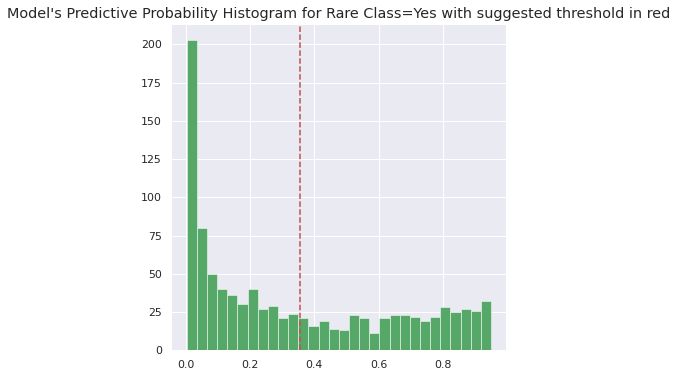

    Using threshold=0.5. However, 0.356 provides better F1=0.63 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 74.6%
Balanced Accuracy = 74.27% with Threshold = 0.50
Confusion Matrix:
[[574 141]
 [ 86 185]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       715
           1       0.57      0.68      0.62       271

    accuracy                           0.77       986
   macro avg       0.72      0.74      0.73       986
weighted avg       0.79      0.77      0.78       986

Balanced Accuracy = 75.94% with Threshold = 0.36
Confusion Matrix:
[[524 191]
 [ 58 213]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81       715
           1       0.53      0.79      0.63       271

    accuracy                           0.75       986
   macro avg       0.71      0.76      0.72

After multiple models, Ensemble Model Results:
    Balanced Accuracy Score = 75.758%
              precision    recall  f1-score   support

           0       0.90      0.73      0.81       715
           1       0.53      0.78      0.63       271

    accuracy                           0.75       986
   macro avg       0.71      0.76      0.72       986
weighted avg       0.80      0.75      0.76       986

[[524 191]
 [ 59 212]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


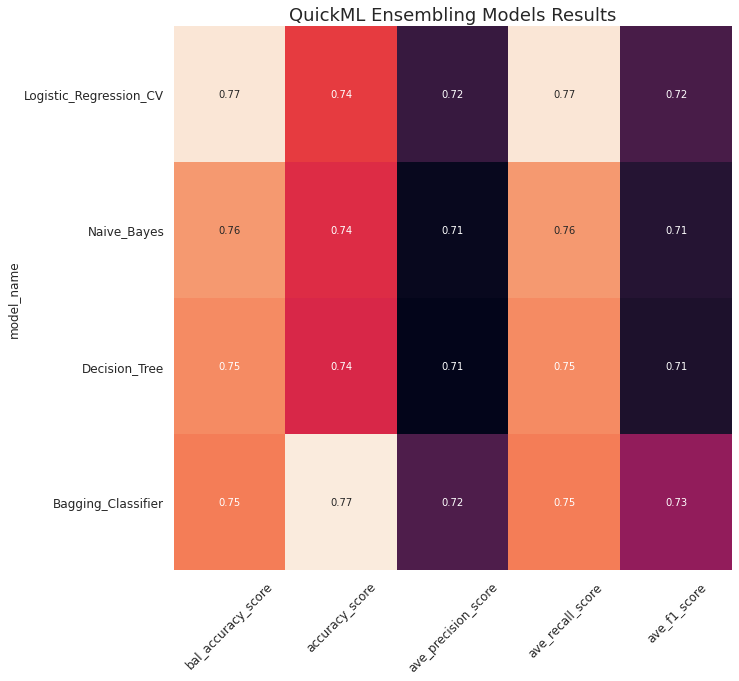

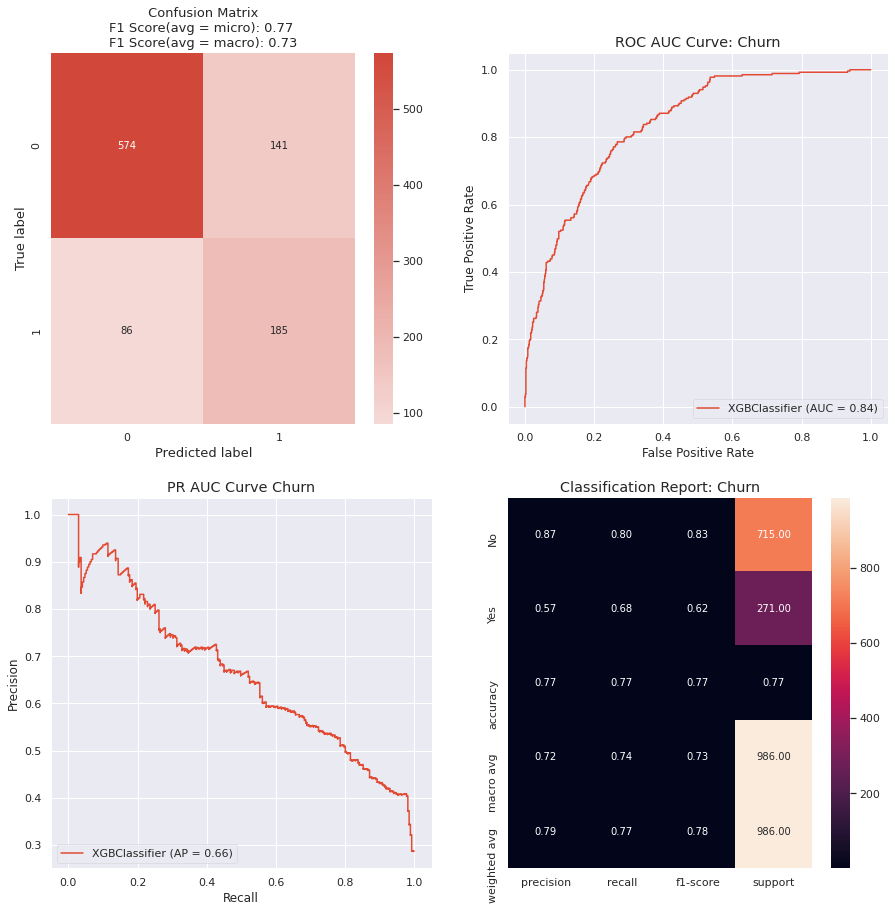

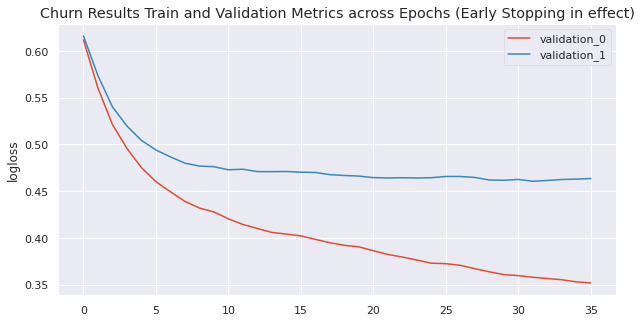

    Time taken for this Target (in seconds) = 40
Training model on complete Train data and Predicting using give Test Data...
    Binning_Flag set to False or there are no numeric vars in data set to be binned
Feature scaling for total 14 float and integer variables completed using MinMaxScaler(copy=True, feature_range=(0, 1))...
##################  Imbalanced Flag Set  ############################
Imbalanced Class Training using SMOTE Rare Class Oversampling method...
    Number of Rare Class samples = 1289
    Number of K Neighbors selected for SMOTE = 10
    Pct of Rare Class in data = 26.15%
This is not an Imbalanced data set. No need to use SMOTE but continuing...
    SMOTE completed. Actual time taken = 0 seconds
##################  Training XGBClassifier on Imbalanced data...  ################
Imbalanced class training completed.
Actual Training time taken in seconds = 2
    Making test Data predictions using modified Threshold = 0.356
    Calculating weighted average ensemble o

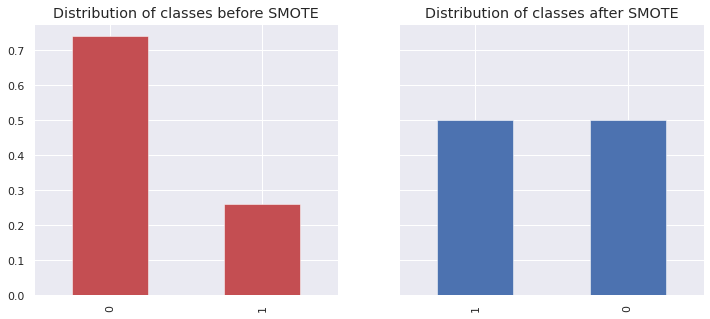

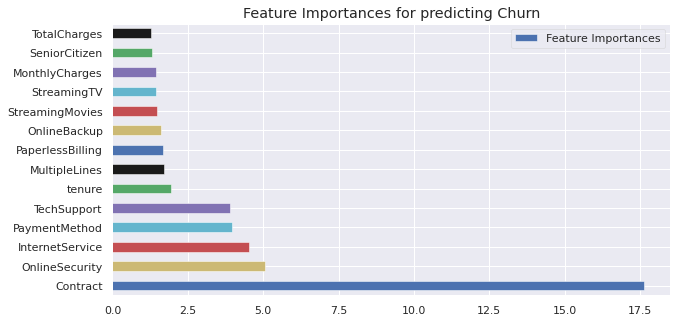

In [21]:
model, features, trainm, testm = Auto_ViML(train_df, target, test_df, sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='RS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=True, 
                                    verbose=1)

hyper_param: Tuning options are GridSearch ('GS') and RandomizedSearch ('RS'). Default is 'GS'.

feature_reduction: Default = 'True' but it can be set to False if you don't want automatic    

Boosting Flag: you have 4 possible choices (default is False):                               
  None = This will build a Linear Model                                                  
  False = This will build a Random Forest or Extra Trees model (also known as Bagging)        
  True = This will build an XGBoost model                                                     
  CatBoost = THis will build a CatBoost model (provided you have CatBoost installed)          



In [22]:
features

['Contract',
 'OnlineSecurity',
 'TechSupport',
 'InternetService',
 'tenure',
 'StreamingMovies',
 'MonthlyCharges',
 'SeniorCitizen',
 'PaperlessBilling',
 'OnlineBackup',
 'MultipleLines',
 'PaymentMethod',
 'StreamingTV',
 'TotalCharges']

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
testm

,Contract,OnlineSecurity,TechSupport,InternetService,tenure,StreamingMovies,MonthlyCharges,SeniorCitizen,PaperlessBilling,OnlineBackup,MultipleLines,PaymentMethod,StreamingTV,TotalCharges,Churn_predictions,Churn_proba_No,Churn_proba_Yes,Churn_Logistic_Regression_CV_predictions,Churn_Decision_Tree_predictions,Churn_Naive_Bayes_predictions,Churn_Bagging_Classifier_predictions,Churn_XGBoost_predictions,Churn_Ensembled_predictions
4930,0.00,0.00,0.00,0.00,0.01,0.00,0.26,0.00,1.00,0.00,0.00,0.33,0.00,0.57,Yes,0.42,0.58,Yes,Yes,Yes,Yes,Yes,Yes
4931,0.00,0.00,1.00,0.50,0.21,1.00,0.85,0.00,1.00,0.00,1.00,0.67,1.00,0.15,Yes,0.08,0.92,Yes,Yes,Yes,Yes,Yes,Yes
4932,0.50,1.00,0.00,0.50,0.38,0.00,0.62,0.00,1.00,1.00,0.00,0.33,0.00,0.28,No,0.89,0.11,No,No,No,No,No,No
4933,0.00,1.00,0.00,0.00,0.06,1.00,0.39,0.00,1.00,1.00,0.50,1.00,1.00,0.29,Yes,0.63,0.37,Yes,No,Yes,No,Yes,Yes
4934,1.00,1.00,0.00,0.50,1.00,1.00,0.92,0.00,1.00,1.00,1.00,0.67,1.00,0.90,No,0.97,0.03,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.50,1.00,1.00,0.00,0.33,1.00,0.66,0.00,1.00,0.00,1.00,1.00,1.00,0.24,No,0.88,0.12,No,No,No,No,No,No
7039,0.50,0.00,0.00,0.50,1.00,1.00,0.85,0.00,1.00,1.00,1.00,0.33,1.00,0.87,No,0.87,0.13,No,No,No,No,No,No
7040,0.00,1.00,0.00,0.00,0.15,0.00,0.11,0.00,1.00,0.00,0.50,0.67,0.00,0.46,Yes,0.43,0.57,No,No,Yes,Yes,Yes,Yes
7041,0.00,0.00,0.00,0.50,0.06,0.00,0.56,1.00,1.00,0.00,1.00,1.00,0.00,0.41,Yes,0.25,0.75,Yes,Yes,Yes,Yes,Yes,Yes


In [0]:
 print(confusion_matrix(test_df[target].values,testm['data_Ensembled_predictions'].values))

[[1376  157]
 [ 278  302]]


In [0]:
print(classification_report(test_df[target].values,testm['data_XGBoost_predictions'].values))

              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1533
         Yes       0.69      0.47      0.56       580

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



In [0]:
print(classification_report(test_df[target].values,testm['data_Ensembled_predictions'].values))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1533
         Yes       0.66      0.52      0.58       580

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113

